<a href="https://colab.research.google.com/github/sadullahmath/Exercise/blob/master/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tuning using GridSearchCV

In [0]:
from sklearn import model_selection, datasets, neighbors

# load the data
cancer = datasets.load_breast_cancer()

# target
y = cancer.target

# features
X = cancer.data

In [0]:
# initialize the estimator
knn = neighbors.KNeighborsClassifier()

In [0]:
# grid contains k and the weight function
grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

In [0]:
# set up the grid search with scoring on precision and number of folds = 10
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)

In [5]:
# start the search
gscv.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [6]:
# view the results
print(gscv.cv_results_)

{'mean_fit_time': array([0.00146253, 0.00127692, 0.00123782, 0.00120726, 0.00123026,
       0.00126915, 0.0012718 , 0.00127633]), 'std_fit_time': array([3.22872018e-04, 1.23980953e-04, 4.75345663e-05, 4.80315161e-05,
       5.67972357e-05, 6.44734976e-05, 6.12650440e-05, 5.71235243e-05]), 'mean_score_time': array([0.00973229, 0.00168581, 0.00289233, 0.00157382, 0.00292175,
       0.00165911, 0.00302005, 0.0016891 ]), 'std_score_time': array([1.94944040e-02, 2.63003139e-04, 1.85471360e-04, 9.49906685e-05,
       8.09714601e-05, 8.60312423e-05, 1.51267598e-04, 8.81938136e-05]), 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                   'uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False, False, False, False, False],
  

In [7]:
import pandas as pd

# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)

# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935549
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931078
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930463
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928752
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928438


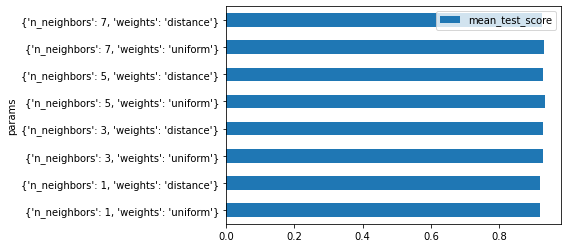

In [8]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')